In [1]:
%load_ext autoreload
%autoreload 2
from optimize_psi import *
from cluster_g_logit_init_acceptpsi import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import rpy2.robjects as robjects
import numpy as np
import os as os
from rpy2.robjects import numpy2ri
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt



# Specify the path to your data files
data_path = "/Users/sarahurbut/tensornoulli_ehr_new/data"

# Activate automatic conversion between R and NumPy arrays
numpy2ri.activate()# Load data saved as .rds files
Y = np.array(robjects.r['readRDS'](os.path.join(data_path, 'Y.rds')))
E = np.array(robjects.r['readRDS'](os.path.join(data_path, 'event_for_aladynoulli.rds')))
G = np.array(robjects.r['readRDS'](os.path.join(data_path, 'prs.rds')))

E = E.astype(int)

# G should be float64
G = G.astype(float)
G.shape
G = G.T
print("G shape after transposition:", G.shape)

# Convert to PyTorch tensors
Y_tensor = torch.FloatTensor(Y)
E_tensor = torch.FloatTensor(E)
G_tensor = torch.FloatTensor(G)

# Get dimensions
N, D, T = Y_tensor.shape
P = G_tensor.shape[1]
T = int(E_tensor.max() + 1)  # 0-indexed time
K = 10  # number of topics

# Print shapes to verify
print("Tensor shapes:")
print(f"Y: {Y_tensor.shape}")  # [N, D]
print(f"E: {E_tensor.shape}")  # [N, D]
print(f"G: {G_tensor.shape}")  # [N, P]
print(f"Time range: 0 to {T-1}")
print(T)
print(K)


import rpy2.robjects as robjects
import pandas as pd
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Load the metadata from R
disease_names = pd.DataFrame(robjects.r['readRDS']('/Users/sarahurbut/Dropbox (Personal)/disease_names.rds'))
prs_names = pd.DataFrame(robjects.r['readRDS']('/Users/sarahurbut/Dropbox (Personal)/prs_names.rds'))
disease_names_list = disease_names[0].tolist()

G shape after transposition: (9661, 36)
Tensor shapes:
Y: torch.Size([9661, 348, 51])
E: torch.Size([9661, 348])
G: torch.Size([9661, 36])
Time range: 0 to 50
51
10


In [3]:
prevalence_t=compute_smoothed_prevalence(Y=Y,window_size=5)
K=20


In [4]:
        # Convert Y to tensor if it's not already
Y_tensor = torch.tensor(Y) if isinstance(Y, np.ndarray) else Y
  

In [5]:
psi_config = {'in_cluster': 1.5, 'out_cluster': -1.5, 'noise_in': 0.1, 'noise_out': 0.01}


In [6]:
# choosing the best

model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(N,D,T,K,P,G_tensor,Y=Y, prevalence_t=prevalence_t,disease_names=disease_names_list)
model.initialize_params(psi_config=psi_config)

/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)


Lambda kernel condition number: 45200668.00
Phi kernel condition number: 89734320.00

Cluster Sizes:
Cluster 0: 27 diseases
Cluster 1: 32 diseases
Cluster 2: 12 diseases
Cluster 3: 9 diseases
Cluster 4: 19 diseases
Cluster 5: 74 diseases
Cluster 6: 31 diseases
Cluster 7: 12 diseases
Cluster 8: 10 diseases
Cluster 9: 8 diseases
Cluster 10: 5 diseases
Cluster 11: 10 diseases
Cluster 12: 6 diseases
Cluster 13: 12 diseases
Cluster 14: 14 diseases
Cluster 15: 9 diseases
Cluster 16: 23 diseases
Cluster 17: 5 diseases
Cluster 18: 18 diseases
Cluster 19: 12 diseases
Initialization complete!

Using psi configuration
Initialization complete!


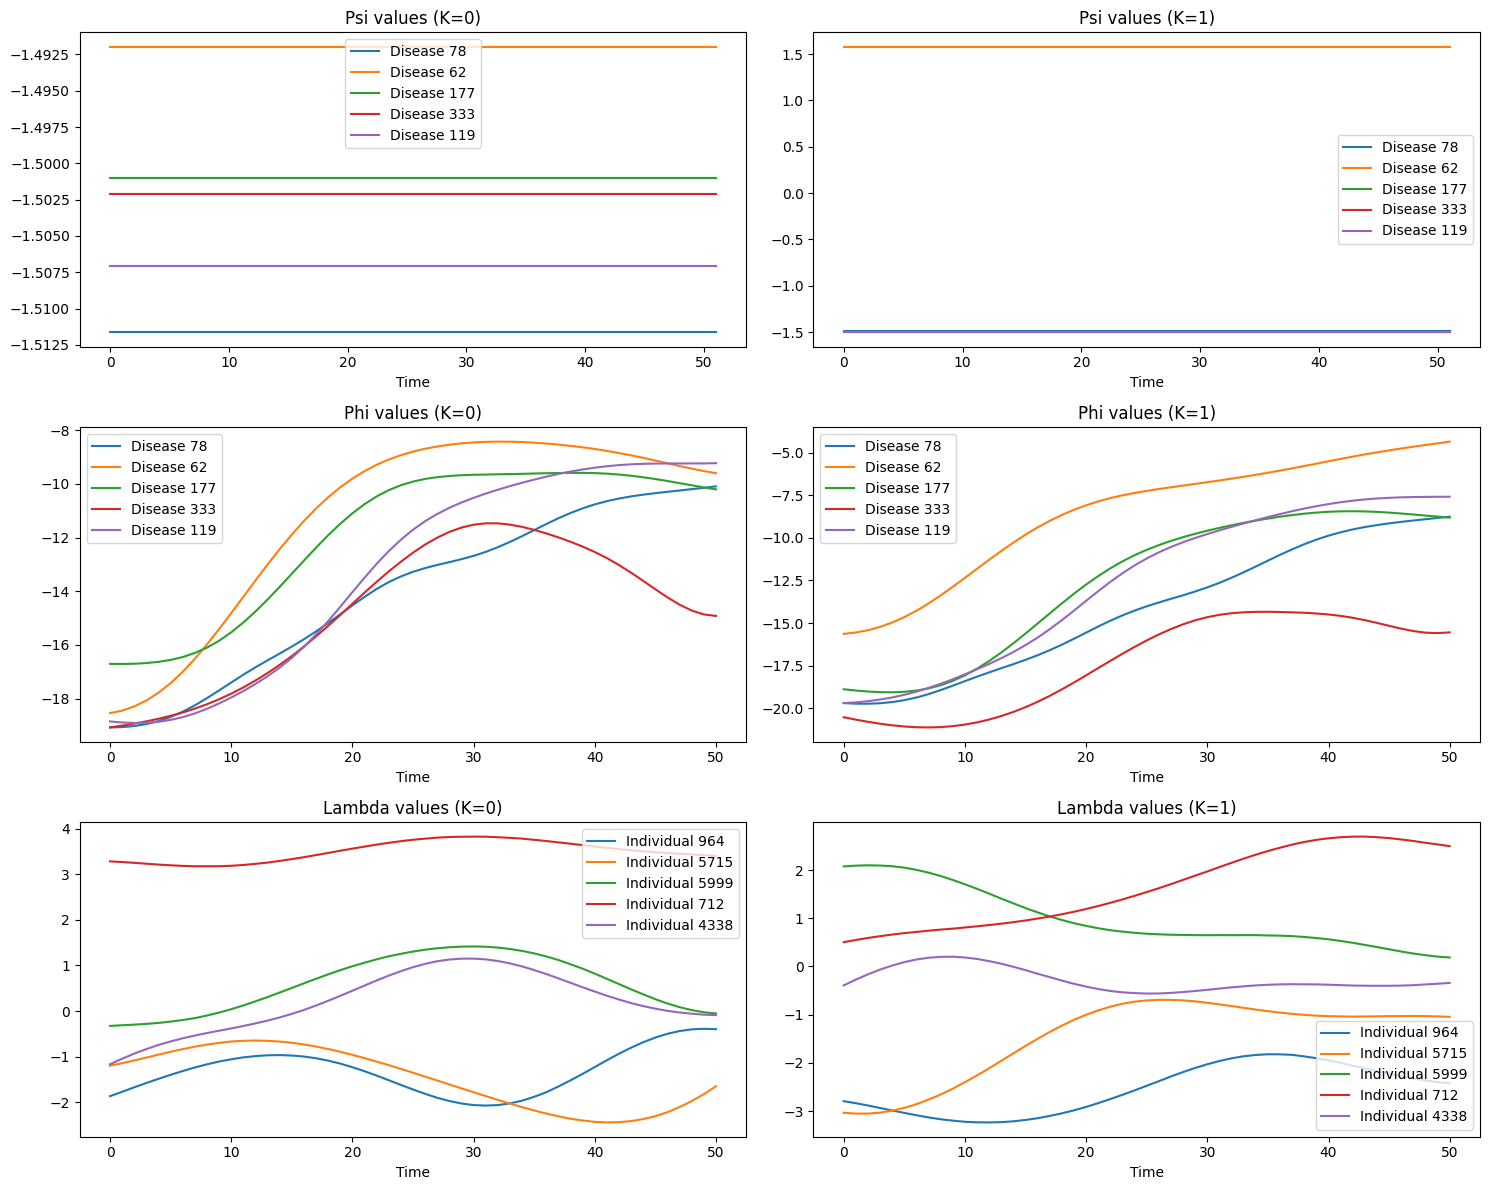


Cluster membership for sampled diseases:
Disease 78: Cluster 2
Disease 62: Cluster 1
Disease 177: Cluster 9
Disease 333: Cluster 6
Disease 119: Cluster 7


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:617: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


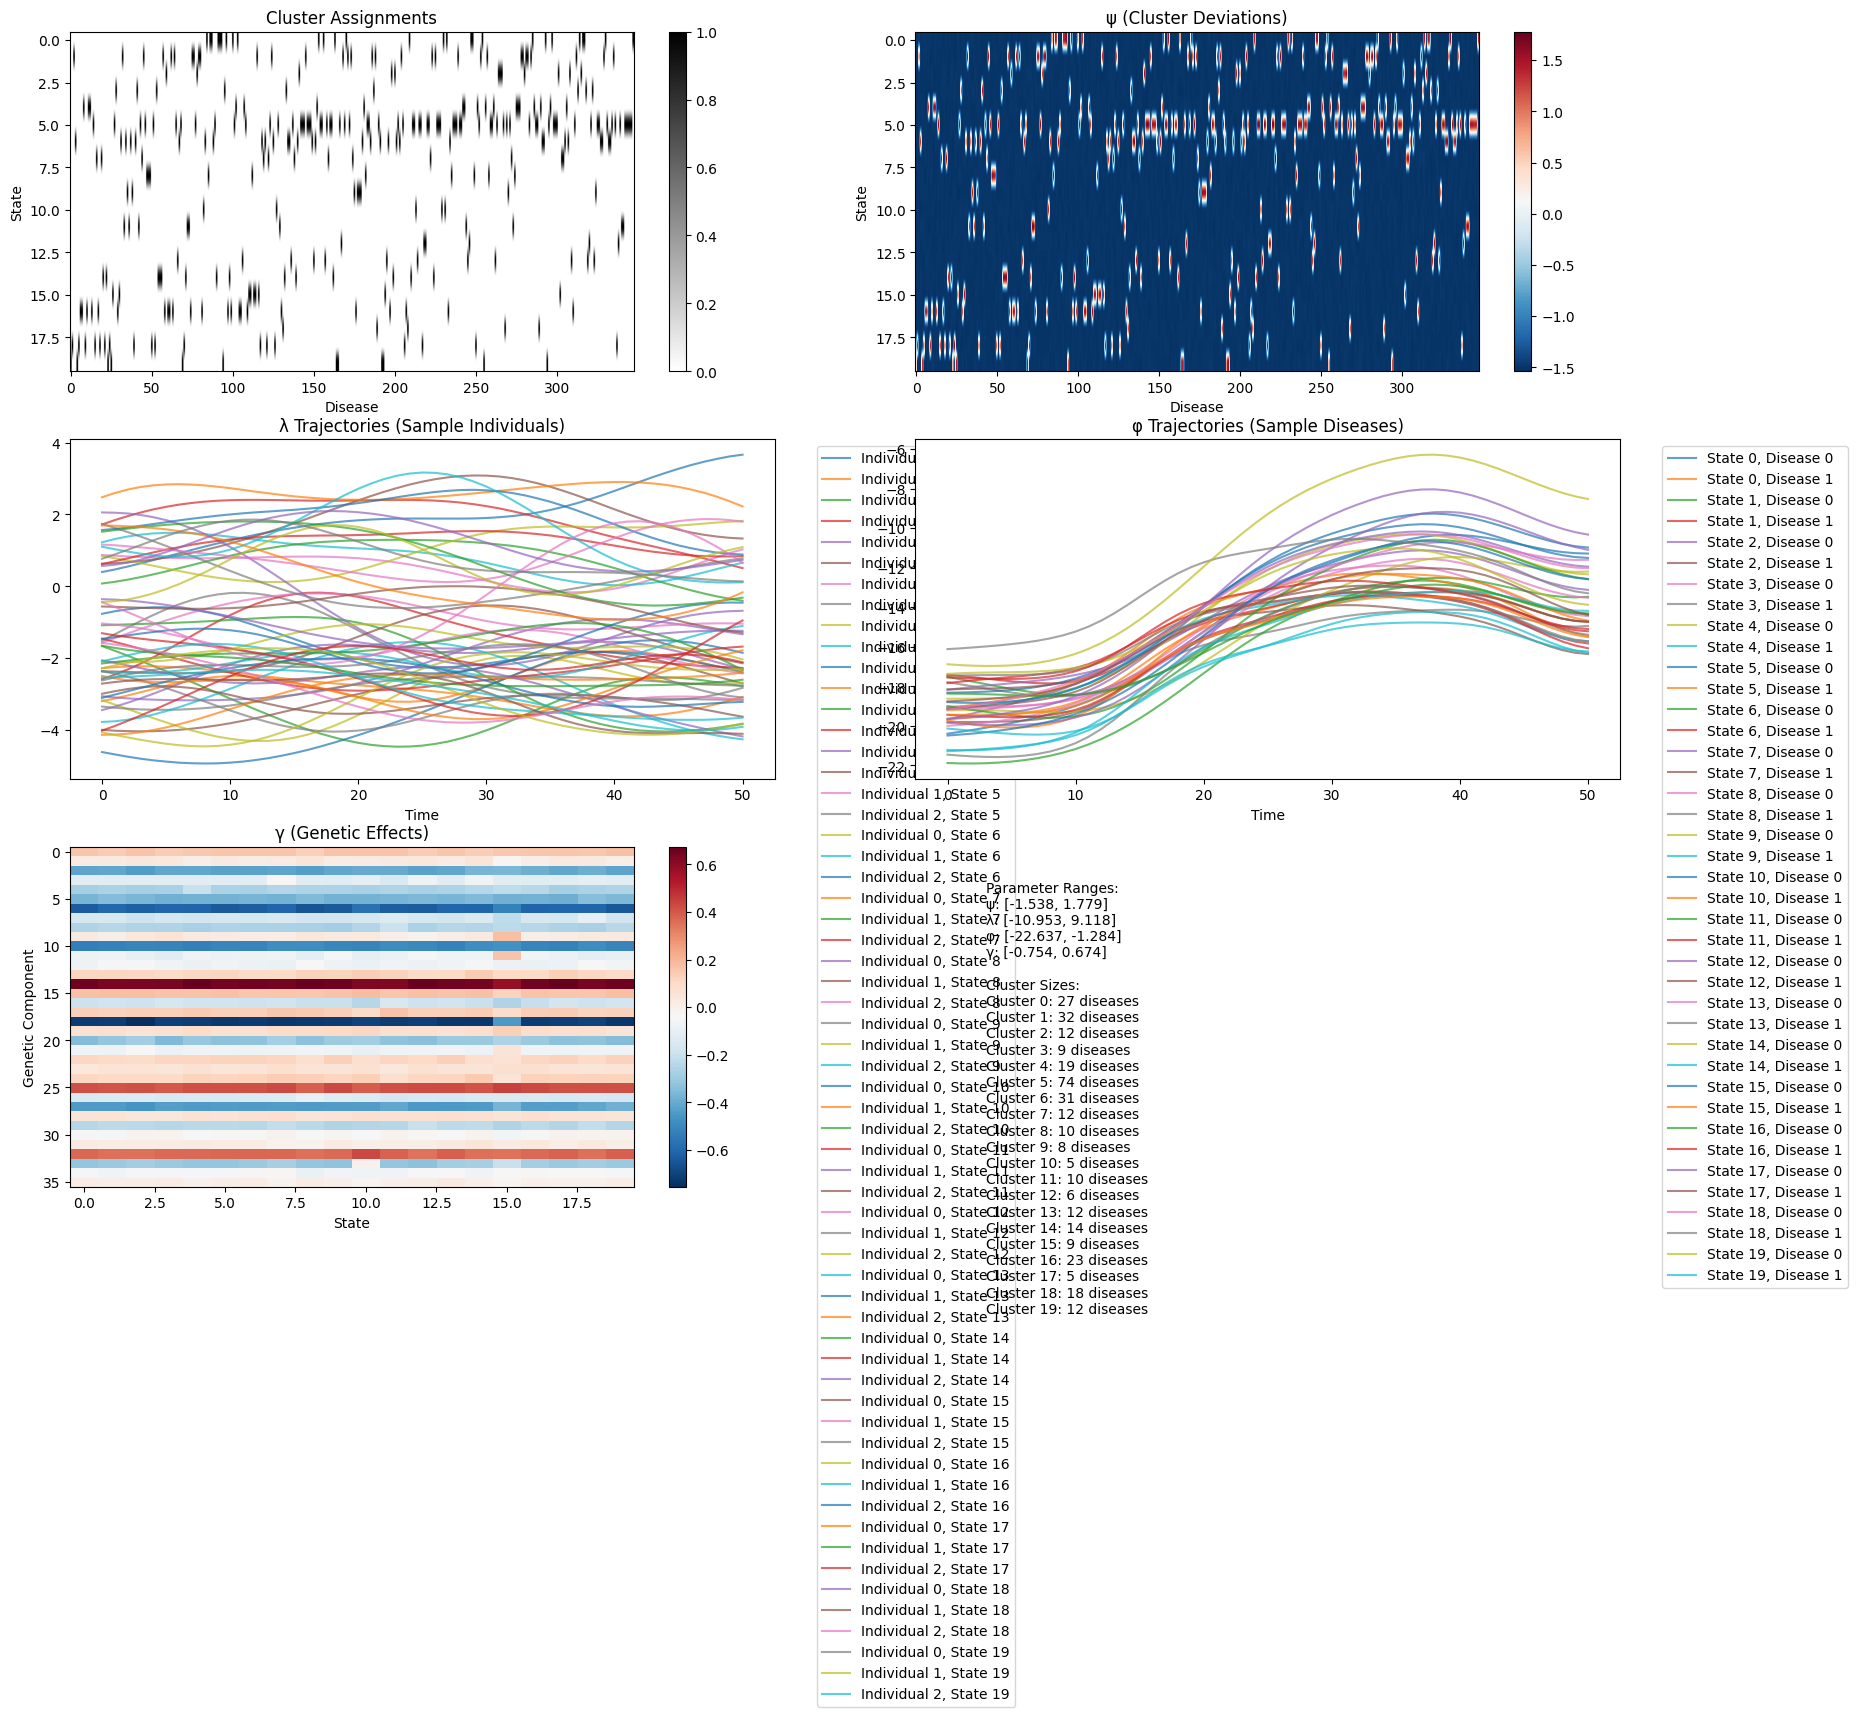

Parameter containing:
tensor([[-1.4829, -1.5017, -1.4809,  ..., -1.4983, -1.5111,  1.3610],
        [-1.4877, -1.5095,  1.4098,  ..., -1.5191, -1.4969, -1.4897],
        [-1.5092, -1.5040, -1.4803,  ..., -1.5052, -1.4944, -1.4945],
        ...,
        [-1.4824, -1.5086, -1.5017,  ..., -1.4995, -1.4927, -1.5036],
        [-1.5155,  1.4073, -1.4866,  ..., -1.4821, -1.5007, -1.4957],
        [ 1.5171, -1.5122, -1.5013,  ..., -1.4952, -1.5072, -1.4942]],
       requires_grad=True)

In [7]:
model.plot_initial_params()
model.visualize_initialization()
model.psi


In [8]:
history = model.fit(E_tensor, num_epochs=1000, learning_rate=1e-4, lambda_reg=1e-2)
        

Starting training...


/Users/sarahurbut/aladynoulli/pyScripts/cluster_g_logit_init_acceptpsi.py:196: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)


mask_before_event shape: torch.Size([9661, 348, 51])
mask_at_event shape: torch.Size([9661, 348, 51])

Epoch 0
Loss: 1104.4407
Psi gradient stats:
Mean: 5.0804e-05
Std:  4.7103e-03
Max:  1.6734e-02
Min:  -1.6462e-02
Average psi change: 1.0002e-04
Epoch 0, Loss: 1104.4407, Gradients - Lambda: 5.596e-01, Phi: 1.348e+01, Gamma: 6.145e-02, Psi: 1.673e-02
mask_before_event shape: torch.Size([9661, 348, 51])
mask_at_event shape: torch.Size([9661, 348, 51])

Epoch 1
Loss: 840.1216
Psi gradient stats:
Mean: 5.2015e-05
Std:  4.6979e-03
Max:  1.6643e-02
Min:  -1.6335e-02
Average psi change: 9.9227e-05
Epoch 1, Loss: 840.1216, Gradients - Lambda: 5.044e-01, Phi: 1.238e+01, Gamma: 5.981e-02, Psi: 1.664e-02

Estimated total training time: 885.1 minutes
mask_before_event shape: torch.Size([9661, 348, 51])
mask_at_event shape: torch.Size([9661, 348, 51])

Epoch 2
Loss: 651.6096
Psi gradient stats:
Mean: 5.3314e-05
Std:  4.6856e-03
Max:  1.6557e-02
Min:  -1.6201e-02
Average psi change: 9.8869e-05
Epoc

In [9]:
psi_config

{'in_cluster': 1.5, 'out_cluster': -1.5, 'noise_in': 0.1, 'noise_out': 0.01}

In [10]:
import torch

# Save complete state for R
# Save components as .rds files
save_path = '/Users/sarahurbut/Dropbox (Personal)/aladynoulli/model_complete_for_R_124_15_15_logitinit_nobg.pt'

torch.save({
    'model_state_dict': model.state_dict(),
    'clusters': model.clusters,
    'psi': model.psi,
    'Y': Y,
    'prevalence_t':prevalence_t,
    'G': G,
    'E': E,
    'disease_names': disease_names,
    'hyperparameters': {
        'N': N,
        'D': D,
        'T': T,
        'P': P,
        'K': K
    }
}, save_path)

import numpy as np
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import numpy2ri
numpy2ri.activate()

# Extract key components from model
with torch.no_grad():
    pi_pred, theta, phi = model.forward()
    
# Convert tensors to numpy arrays - check type first
pi_pred = pi_pred.cpu().detach().numpy()
theta = theta.cpu().detach().numpy()
phi = model.phi.cpu().detach().numpy()
psi = model.psi.cpu().detach().numpy()
lambda_vals = model.lambda_.cpu().detach().numpy()

# These are already numpy arrays
clusters = model.clusters  # Already numpy


save_path = '/Users/sarahurbut/Dropbox (Personal)/aladynoulli/Rdata/'
# Main parameters
robjects.r.saveRDS(phi, f"{save_path}phi15.rds")
robjects.r.saveRDS(psi, f"{save_path}psi15.rds")
robjects.r.saveRDS(lambda_vals, f"{save_path}lambda15.rds")
robjects.r.saveRDS(theta, f"{save_path}theta15.rds")
robjects.r.saveRDS(pi_pred, f"{save_path}pi_pred15.rds")
robjects.r.saveRDS(clusters, f"{save_path}clusters15.rds")


<rpy2.rinterface_lib.sexp.NULLType object at 0x17ca3c380> [RTYPES.NILSXP]

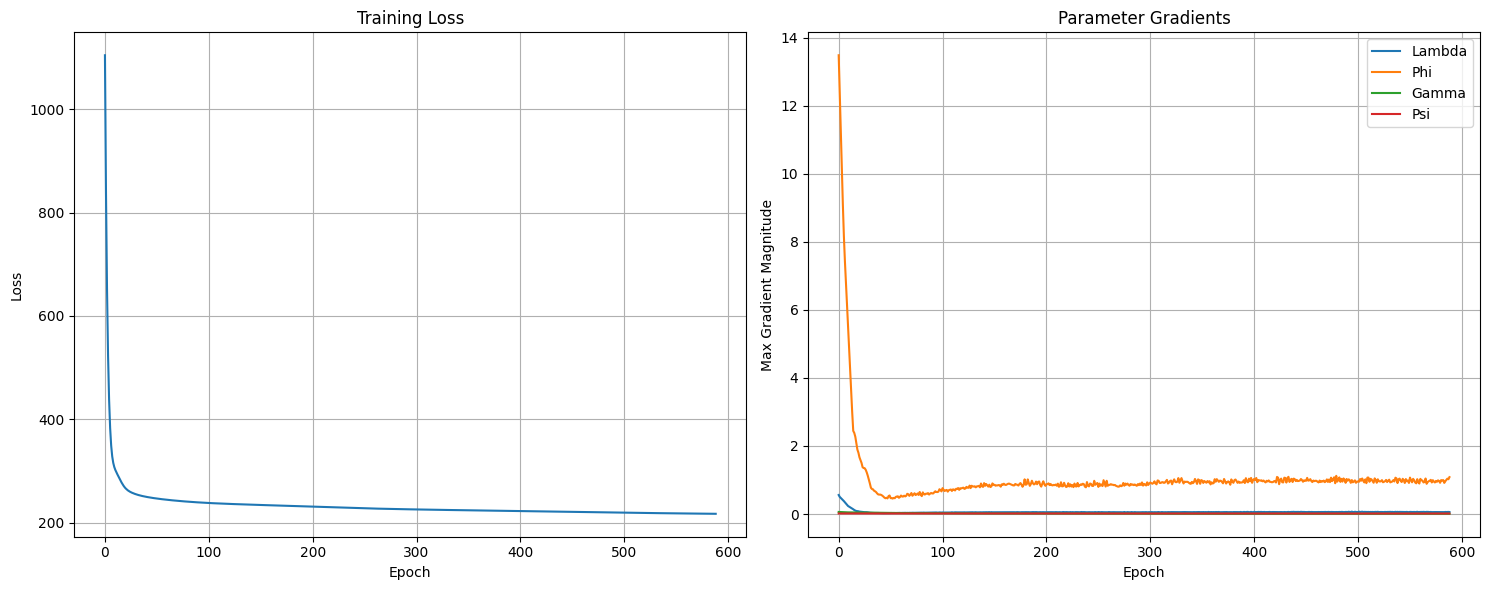

In [11]:
import matplotlib.pyplot as plt

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot loss
ax1.plot(history['loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot gradients
ax2.plot(history['max_grad_lambda'], label='Lambda')
ax2.plot(history['max_grad_phi'], label='Phi')
ax2.plot(history['max_grad_gamma'], label='Gamma')
ax2.plot(history['max_grad_psi'], label='Psi')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Max Gradient Magnitude')
ax2.set_title('Parameter Gradients')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [12]:
def plot_signature_top_diseases_centered(model, disease_names, n_top=10):
    """
    Show top diseases for each signature, centered relative to prevalence
    """
    # Get phi and prevalence
    phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    prevalence_logit = model.logit_prev_t.detach().numpy()  # Shape: (D, T)
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    # Average over time
    phi_avg = phi_centered.mean(axis=2)  # Shape: (K, D)
    
    # For each signature, get top diseases
    for k in range(phi_avg.shape[0]):
        scores = phi_avg[k, :]
        top_indices = np.argsort(scores)[-n_top:][::-1]
        
        print(f"\nTop {n_top} diseases in Signature {k} (relative to baseline):")
        for idx in top_indices:
            avg_effect = scores[idx]
            temporal_std = np.std(phi_centered[k, idx, :])
            # Convert to odds ratio for interpretability
            odds_ratio = np.exp(avg_effect)
            print(f"{disease_names[idx]}: effect={avg_effect:.3f} (OR={odds_ratio:.2f}), std={temporal_std:.3f}")

# Run visualization
plot_signature_top_diseases_centered(model, disease_names_list)


Top 10 diseases in Signature 0 (relative to baseline):
Irregular menstrual bleeding: effect=4.135 (OR=62.47), std=0.675
Benign neoplasm of ovary: effect=3.035 (OR=20.81), std=0.739
Postmenopausal atrophic vaginitis: effect=2.854 (OR=17.35), std=0.430
Dysmenorrhea: effect=2.384 (OR=10.85), std=0.386
Endometriosis: effect=2.282 (OR=9.80), std=0.640
Uterine/Uterovaginal prolapse: effect=2.110 (OR=8.25), std=0.361
Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia]: effect=2.035 (OR=7.65), std=0.367
Prolapse of vaginal walls: effect=1.996 (OR=7.36), std=0.655
Ovarian cyst: effect=1.784 (OR=5.96), std=1.398
Hypertrophy of female genital organs: effect=1.780 (OR=5.93), std=0.227

Top 10 diseases in Signature 1 (relative to baseline):
Internal derangement of knee: effect=3.213 (OR=24.84), std=0.948
Other acquired deformities of limbs: effect=2.954 (OR=19.18), std=0.691
Other derangement of joint: effect=2.660 (OR=14.30), std=0.264
Hammer toe (acquired): effect=2.541 (OR=12.69), std

In [13]:
def compare_disease_rankings(model, disease_names, n_top=10):
    """
    Compare initial vs final disease rankings for each signature
    """
    # Get initial rankings from psi
    psi = model.psi.detach().numpy()  # Shape: (K, D)
    
    # Get final rankings from centered phi
    phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    prevalence_logit = model.logit_prev_t.detach().numpy()  # Shape: (D, T)
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    # Average over time
    phi_avg = phi_centered.mean(axis=2)  # Shape: (K, D)
    
    # Compare rankings for each signature
    for k in range(phi_avg.shape[0]):
        print(f"\nSignature {k}:")
        
        # Get initial top diseases from psi
        initial_scores = psi[k, :]
        initial_top = np.argsort(initial_scores)[-n_top:][::-1]
        
        # Get final top diseases from phi
        final_scores = phi_avg[k, :]
        final_top = np.argsort(final_scores)[-n_top:][::-1]
        
        print("\nInitial top diseases:")
        for i, idx in enumerate(initial_top):
            print(f"{i+1}. {disease_names[idx]}: {initial_scores[idx]:.3f}")
            
        print("\nFinal top diseases:")
        for i, idx in enumerate(final_top):
            print(f"{i+1}. {disease_names[idx]}: {final_scores[idx]:.3f}")
            
        # Calculate rank changes
        initial_ranks = {disease: rank for rank, disease in enumerate(initial_top)}
        final_ranks = {disease: rank for rank, disease in enumerate(final_top)}
        
        # Find diseases that changed ranks significantly
        changed_diseases = set(initial_top) | set(final_top)
        for disease in changed_diseases:
            initial_rank = initial_ranks.get(disease, n_top+1)
            final_rank = final_ranks.get(disease, n_top+1)
            if abs(final_rank - initial_rank) > 2:  # Threshold for significant change
                print(f"\n{disease_names[disease]} changed from rank {initial_rank+1} to {final_rank+1}")

# Run comparison
compare_disease_rankings(model, disease_names_list)


Signature 0:

Initial top diseases:
1. Postmenopausal atrophic vaginitis: 1.692
2. Cervicitis and endocervicitis: 1.668
3. Irregular menstrual bleeding: 1.664
4. Endometriosis: 1.635
5. Irregular menstrual cycle/bleeding: 1.609
6. Disorders of uterus, NEC: 1.600
7. Noninflammatory disorders of cervix: 1.572
8. Dysmenorrhea: 1.564
9. Polyp of corpus uteri: 1.559
10. Hypertrophy of female genital organs: 1.557

Final top diseases:
1. Irregular menstrual bleeding: 4.135
2. Benign neoplasm of ovary: 3.035
3. Postmenopausal atrophic vaginitis: 2.854
4. Dysmenorrhea: 2.384
5. Endometriosis: 2.282
6. Uterine/Uterovaginal prolapse: 2.110
7. Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia]: 2.035
8. Prolapse of vaginal walls: 1.996
9. Ovarian cyst: 1.784
10. Hypertrophy of female genital organs: 1.780

Cervical intraepithelial neoplasia [CIN] [Cervical dysplasia] changed from rank 12 to 7

Polyp of corpus uteri changed from rank 9 to 12

Ovarian cyst changed from rank 12 to 9

Ben

In [14]:
def visualize_predictions(model, Y, event_times):
    with torch.no_grad():
        pi_pred, _, _ = model.forward()
        pi_pred = pi_pred.cpu().numpy()
    
    N, D, T = Y.shape
    at_risk = np.zeros_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            at_risk[n,d,:event_times[n,d]] = True
    
    # Get predictions
    event_probs = pi_pred[Y == 1 & at_risk]
    nonevent_probs = pi_pred[Y == 0 & at_risk]
    
    plt.figure(figsize=(15, 5))
    
    # 1. Density plot of predictions
    plt.subplot(131)
    plt.hist(event_probs, bins=50, density=True, alpha=0.5, label='Events', color='red')
    plt.hist(nonevent_probs, bins=50, density=True, alpha=0.5, label='Non-events', color='blue')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title('Distribution of Predictions')
    plt.legend()
    
    # 2. ROC curve
    from sklearn.metrics import roc_curve, auc
    y_true = np.concatenate([np.ones_like(event_probs), np.zeros_like(nonevent_probs)])
    y_pred = np.concatenate([event_probs, nonevent_probs])
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.subplot(132)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    # 3. Calibration plot
    from sklearn.calibration import calibration_curve
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10)
    
    plt.subplot(133)
    plt.plot(prob_pred, prob_true, marker='o', label='Model')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Empirical probability')
    plt.title('Calibration Plot')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Average pi for events: {event_probs.mean():.4f} (std: {event_probs.std():.4f})")
    print(f"Average pi for non-events: {nonevent_probs.mean():.4f} (std: {nonevent_probs.std():.4f})")
    print(f"AUC: {roc_auc:.4f}")
    
    return event_probs, nonevent_probs, roc_auc

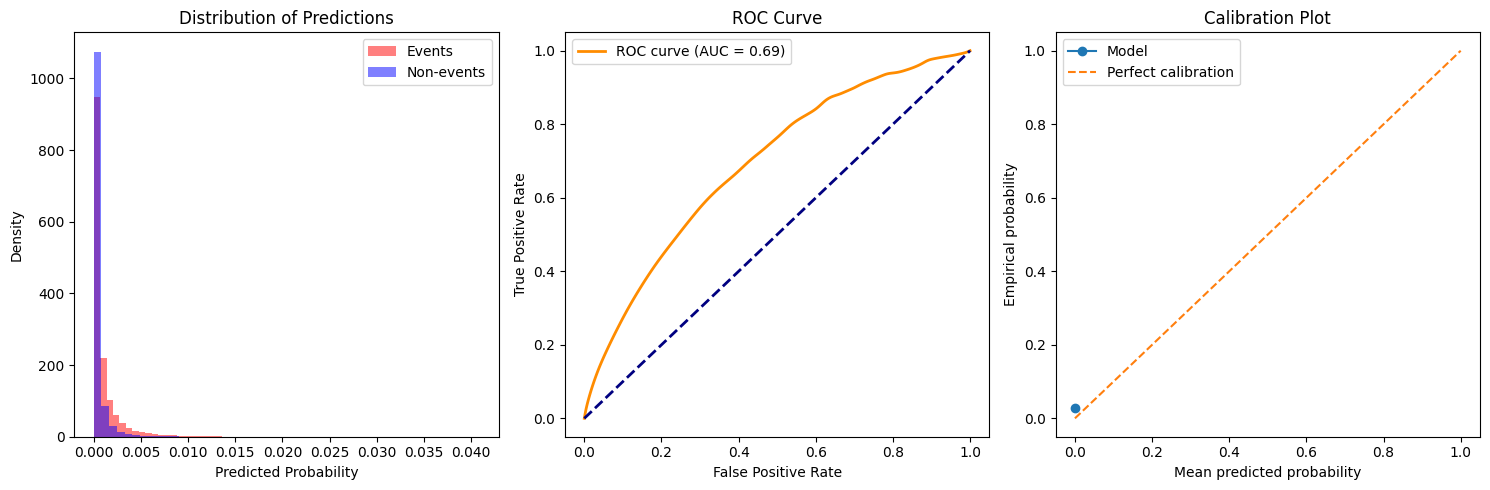

Average pi for events: 0.0010 (std: 0.0017)
Average pi for non-events: 0.0004 (std: 0.0009)
AUC: 0.6917


(array([5.6849360e-05, 5.1999676e-05, 4.6067595e-05, ..., 1.1411139e-06,
        1.8293485e-07, 9.9999999e-09], dtype=float32),
 array([1.e-08, 1.e-08, 1.e-08, ..., 1.e-08, 1.e-08, 1.e-08], dtype=float32),
 0.6917139378216937)

In [35]:
visualize_predictions(model, Y, E)

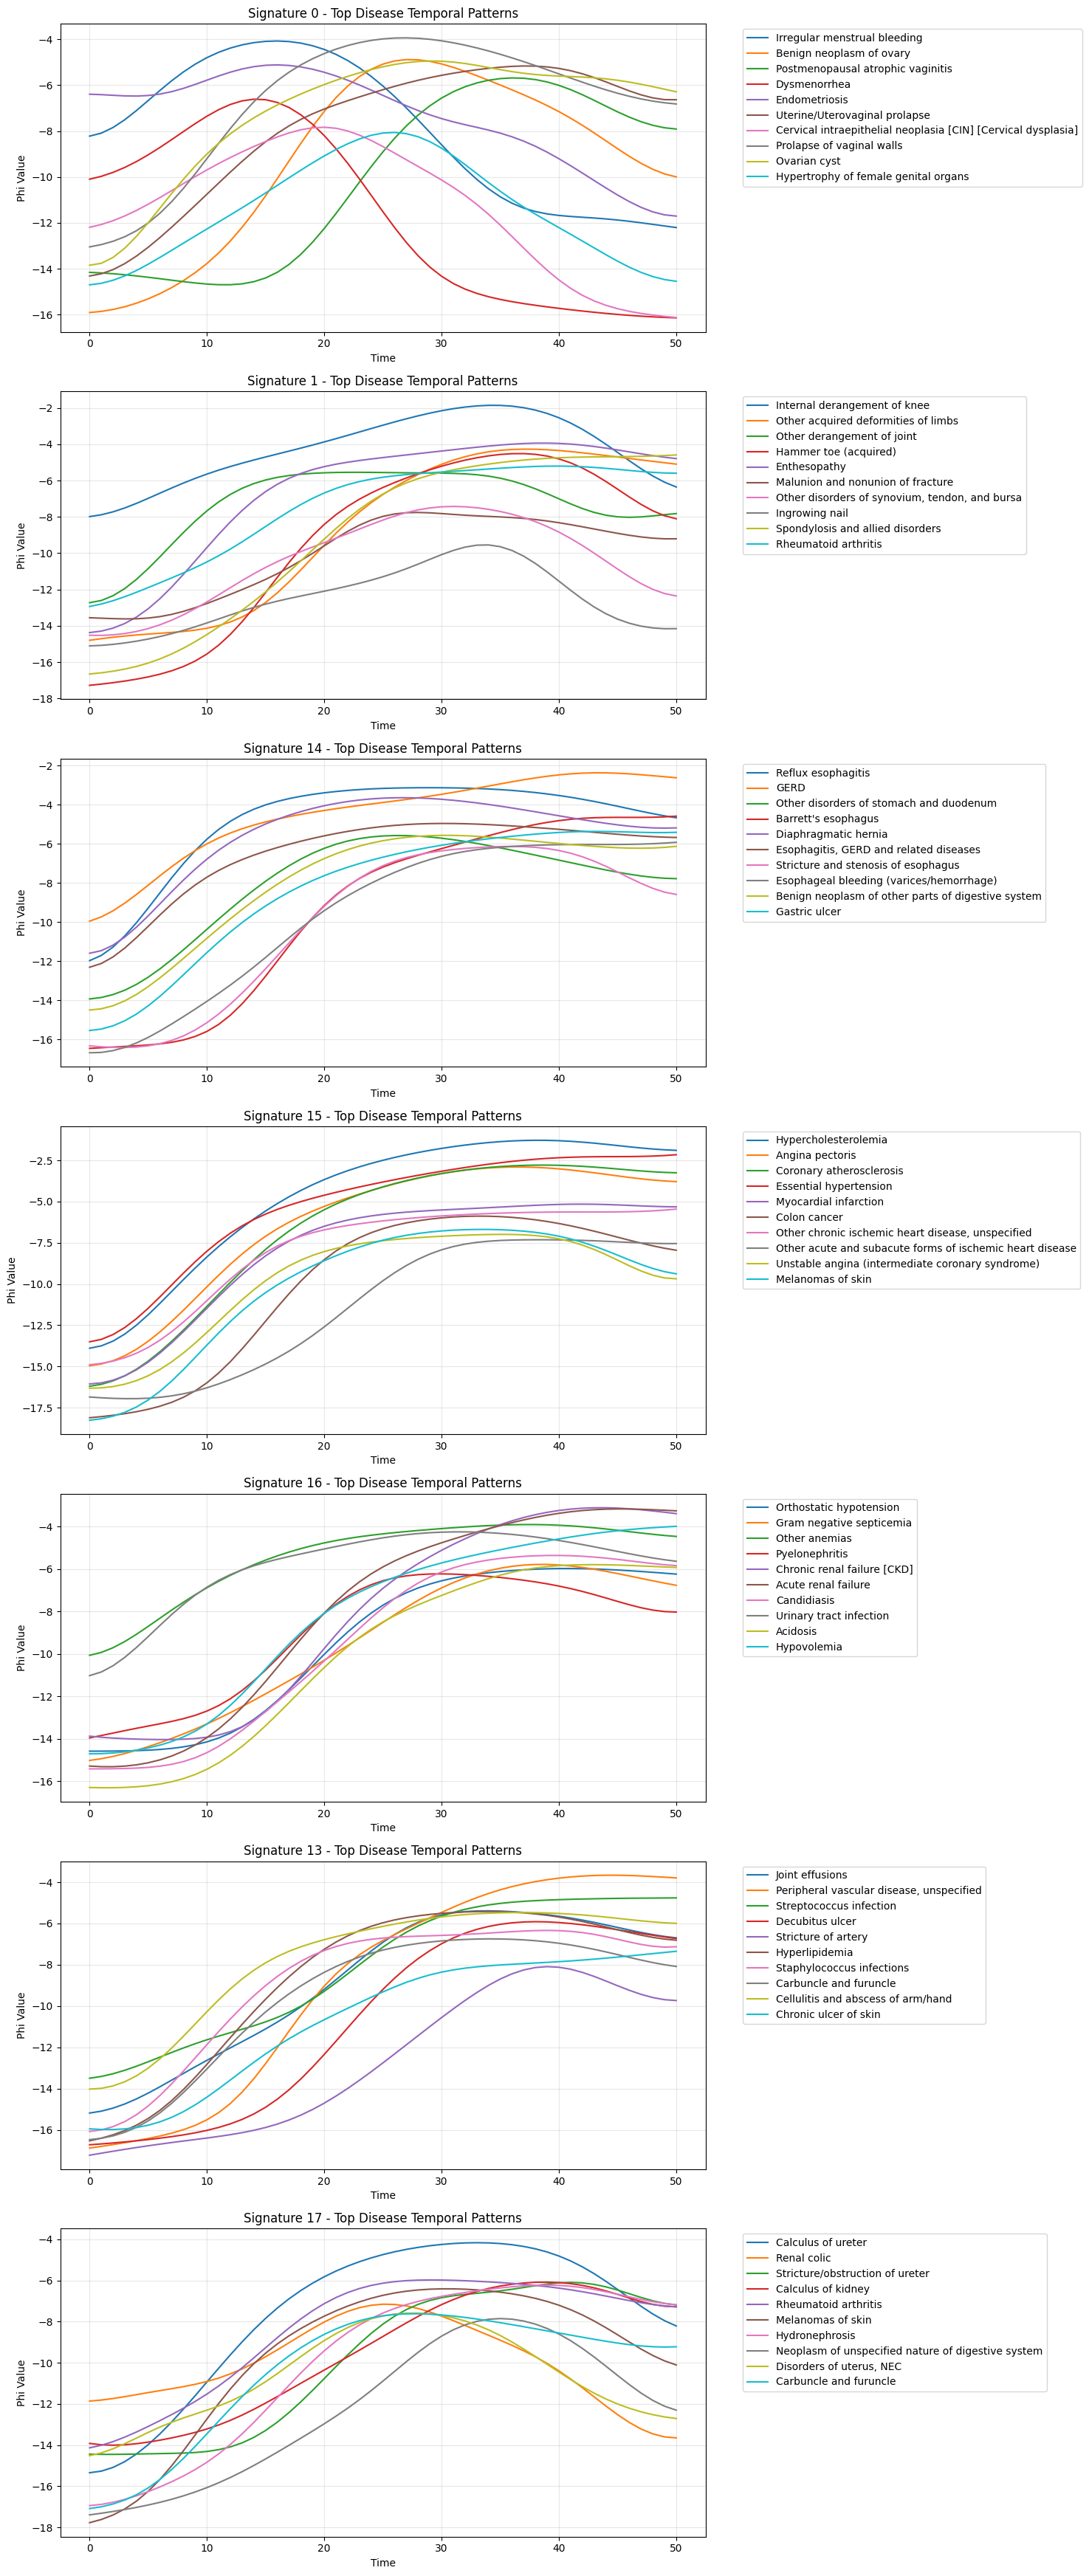

In [15]:
def plot_signature_temporal_patterns(model, disease_names, n_top=10, selected_signatures=None):
    """
    Show temporal patterns of top diseases for each signature
    """
    #phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    #phi_avg = phi.mean(axis=2)  # Average over time

     # Get phi and prevalence
    phi = model.phi.detach().numpy()  # Shape: (K, D, T)
    prevalence_logit = model.logit_prev_t.detach().numpy()  # Shape: (D, T)
    
    # Center phi relative to prevalence
    phi_centered = np.zeros_like(phi)
    for k in range(phi.shape[0]):
        for d in range(phi.shape[1]):
            phi_centered[k, d, :] = phi[k, d, :] - prevalence_logit[d, :]
    
    # Average over time
    phi_avg = phi_centered.mean(axis=2)  # Shape: (K, D)
    
    # Select which signatures to plot
    if selected_signatures is None:
        selected_signatures = range(phi_avg.shape[0])
    
    # Create subplots for each selected signature
    n_sigs = len(selected_signatures)
    fig, axes = plt.subplots(n_sigs, 1, figsize=(15, 5*n_sigs))
    if n_sigs == 1:
        axes = [axes]
    
    for i, k in enumerate(selected_signatures):
        # Get top diseases
        scores = phi_avg[k, :]
        top_indices = np.argsort(scores)[-n_top:][::-1]
        
        # Plot temporal patterns
        ax = axes[i]
        for idx in top_indices:
            temporal_pattern = phi[k, idx, :]
            ax.plot(temporal_pattern, label=disease_names[idx])
        
        ax.set_title(f'Signature {k} - Top Disease Temporal Patterns')
        ax.set_xlabel('Time')
        ax.set_ylabel('Phi Value')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# First show the top diseases


# Then show their temporal patterns
# You can select specific signatures of interest:
plot_signature_temporal_patterns(model, disease_names_list, selected_signatures=[0,1,14,15,16,13,17])

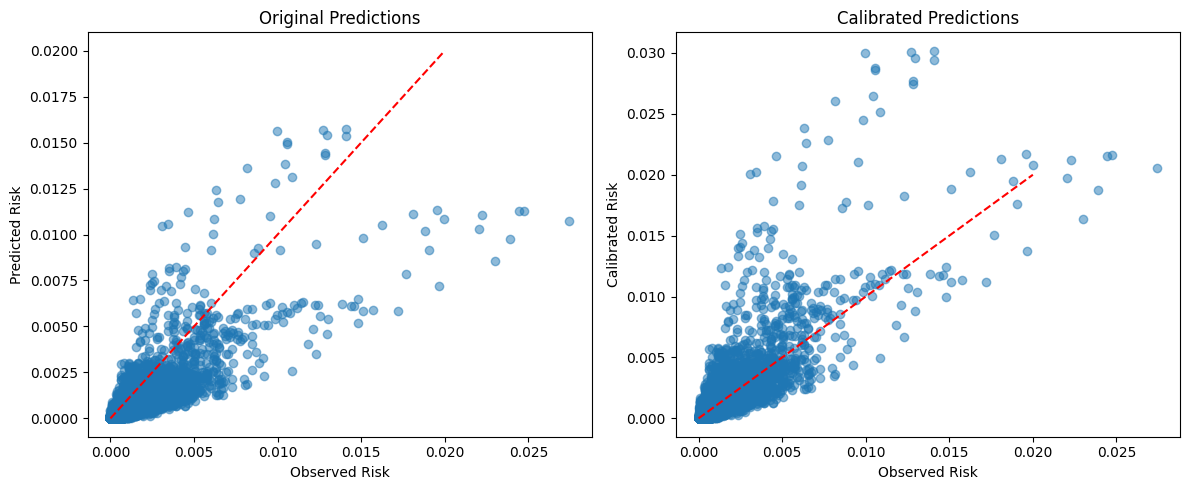

Mean observed risk: 0.000613
Mean predicted risk (original): 0.000320
Mean predicted risk (calibrated): 0.000613
Calibration scale factor: 1.917


In [16]:
# 1. Get predictions and actual values
predicted = model.forward()
pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
pi_pred = pi_pred.cpu().detach().numpy()
Y = model.Y.cpu().detach().numpy()

# 2. Calculate marginal risks directly
# Assuming dimensions are: [N, D, T] for both Y and pi_pred
observed_risk = Y.mean(axis=0).flatten()  # average across individuals
predicted_risk = pi_pred.mean(axis=0).flatten()

# 3. Apply calibration
scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
calibrated_risk = predicted_risk * scale_factor

# 4. Plot
plt.figure(figsize=(12, 5))

# Original predictions
plt.subplot(121)
plt.scatter(observed_risk, predicted_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Original Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')

# Calibrated predictions
plt.subplot(122)
plt.scatter(observed_risk, calibrated_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Calibrated Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Calibrated Risk')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean observed risk: {np.mean(observed_risk):.6f}")
print(f"Mean predicted risk (original): {np.mean(predicted_risk):.6f}")
print(f"Mean predicted risk (calibrated): {np.mean(calibrated_risk):.6f}")
print(f"Calibration scale factor: {scale_factor:.3f}")


In [18]:
ss_res = np.sum((observed_risk - predicted_risk) ** 2)
ss_tot = np.sum((observed_risk - np.mean(observed_risk)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2: {r2:.3f}")

R^2: 0.619
